## Import needed modules

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# reading data
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
print("Min area is: ", df.area.min())
print("Max area is: ", df.area.max())

Min area is:  2600
Max area is:  4000


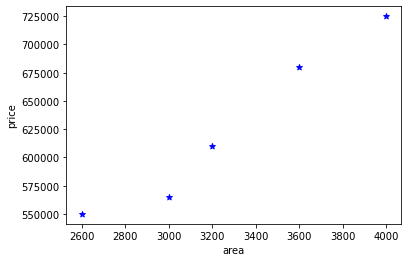

In [7]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='blue', marker='*')
plt.show()

In [10]:
# to make area as a feature (x)
area = df.drop('price', axis='columns')
print(type(area))
area

<class 'pandas.core.frame.DataFrame'>


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [11]:
# to make price as a feature (y)
price = df.drop('area', axis='columns')
print(type(price))
price

<class 'pandas.core.frame.DataFrame'>


,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [12]:
# creating linear regression object caled "reg"
reg = linear_model.LinearRegression()
# fitting data into regression
# model.fit(x, y) x: all features, y: value to predict
reg.fit(area, price)

LinearRegression()

## predict price of a home with area = 3300 sqr ft

In [13]:
reg.predict([[3300]])

C:\Users\20155\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [14]:
reg.predict([[3200], [3300], [4200]])

C:\Users\20155\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[615136.98630137],
       [628715.75342466],
       [750924.65753425]])

## To calculate accuracy

In [15]:
reg.score(area, price)

0.9584301138199486

## Y = m * x + b (m is coefficient and b is intercpt)

In [17]:
# to get m
reg.coef_

array([[135.78767123]])

In [19]:
# to get b
reg.intercept_

array([180616.43835616])

In [20]:
# to calaulate y (price)
3300 * 135.78767123 + 180616.43835616

628715.75341516

In [21]:
# predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

C:\Users\20155\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])

In [23]:
# to calculate y (price)
5000 *  135.78767123 + 180616.43835616

859554.7945061601

In [24]:
# reading areas.csv data
area_df = pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [29]:
# predict prices for areas
p = reg.predict(area_df)
p
#p = reg.predict([[1000], [1500], [2300], [3540], [4120], [4560], [5490], [3460], [4750], [2300],
#             [9000], [8600], [7100]])


array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [30]:
type(p)

numpy.ndarray

In [31]:
#  creating prices column
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [33]:
# saving area_df into csv file
area_df.to_csv('prediction.csv', index=False )